# Applying search to K34 lightcurve

In [1]:
#can we find K34 while assuming basic values for the e and i parameters?
import copy
import numpy as np
import matplotlib.pyplot as p
import astropy.units as u
import funcs

%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [9]:
#Load lightcurve

lc = np.genfromtxt('Lightcurves/K34_clean_noecl.txt')
time = lc[:,0]+2454833
flux = lc[:,1]
err = lc[:,2]

In [4]:
# Kepler 34
cb = funcs.CBSystem(m1 = 1.0479,f1 = 1.,m2 = 1.0208,f2 = 0.8475,
                    ab = 0.22882,r1 = 1.1618 * u.Rsun.to('au'),r2 = 1.0927 * u.Rsun.to('au'),
                    eb = 0.52087,ib = np.deg2rad(89.8584),wb = 1.2468,
                    fb = 3.4675,
                    mp = 0.220 * u.Mjup.to('Msun'),ap = 1.0896,rp = 0.764 * u.Rjupiter.to('au'),ep = 0.182,
                    ip = np.deg2rad(90.355),wp = 0.1378,fp = 2.0623,
                    Wp = np.deg2rad(-1.74),
                    t0 = 2454969.2000)
ab0 = cb.ab
mb0 = cb.m1 + cb.m2
p_p0 = (cb.ap**3/(cb.m1+cb.m2))**(1./2.)*365.25 #in days
fp0 = cb.fp
print(1/np.sqrt( (cb.m1+cb.m2)/cb.ab**3 )*365.25)
print(p_p0)

timing_precision = 30./86400./365.25 * (2*np.pi)  #in years/2pi
dt = 0.02
t = np.arange(2454953,2456424,dt)


27.7960087219
288.8298729659465


In [5]:
tts = funcs.reb_cb(cb,tmin=np.min(t),tmax=np.max(t))
tts_2,tds_2 = funcs.reb_cb_dvm(cb,0,2,tmin=np.min(t),tmax=np.max(t), timing_precision=timing_precision)
    
ok = tts[:,0] == 20
#ref_tts = tts[ok]
ref_tts = tts_2[tds_2>0]
ref_tds = tds_2[tds_2>0]
print(ref_tts)
print(ref_tds)

[ 2455227.38082189  2455508.31348844  2455789.78155899  2456075.85928388
  2456366.55246815]
[ 0.30109422  0.14015233  0.19219267  0.77160327  0.1319487 ]


In [6]:
#degrading our knowledge (assume we know eb and wb):
#for now, radii left as we know them - this will change transit durations, and whether some marginal transits happen.

cb.ib = np.pi/2.
cb.ip = np.pi/2.
cb.Wp = 0.0
cb.ep = 0.0
#cb.wp left as is because it defines f_p
cb.mp = 0.0

In [10]:
#lightcurve statistic - transfer lightcurve to a varying duration statistic. 
#0.1d, 0.15d, 0.2d, .25d, .3d, .35d, 0.4d, .45d, .5d (not all useful for K16, but generally speaking will be)

windows = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
minpoints = 3
blurfactor = 1. #using a blurfactor of win means a 3 duration window is scanned.
#window lightcurve with duration - 
lcstat = {}
blurlcstat = {}
for win in windows:
    lcstat[win], blurlcstat[win] = funcs.running_mean_gaps(time,flux,win,minpoints,blurfactor)


<IPython.core.display.Javascript object>


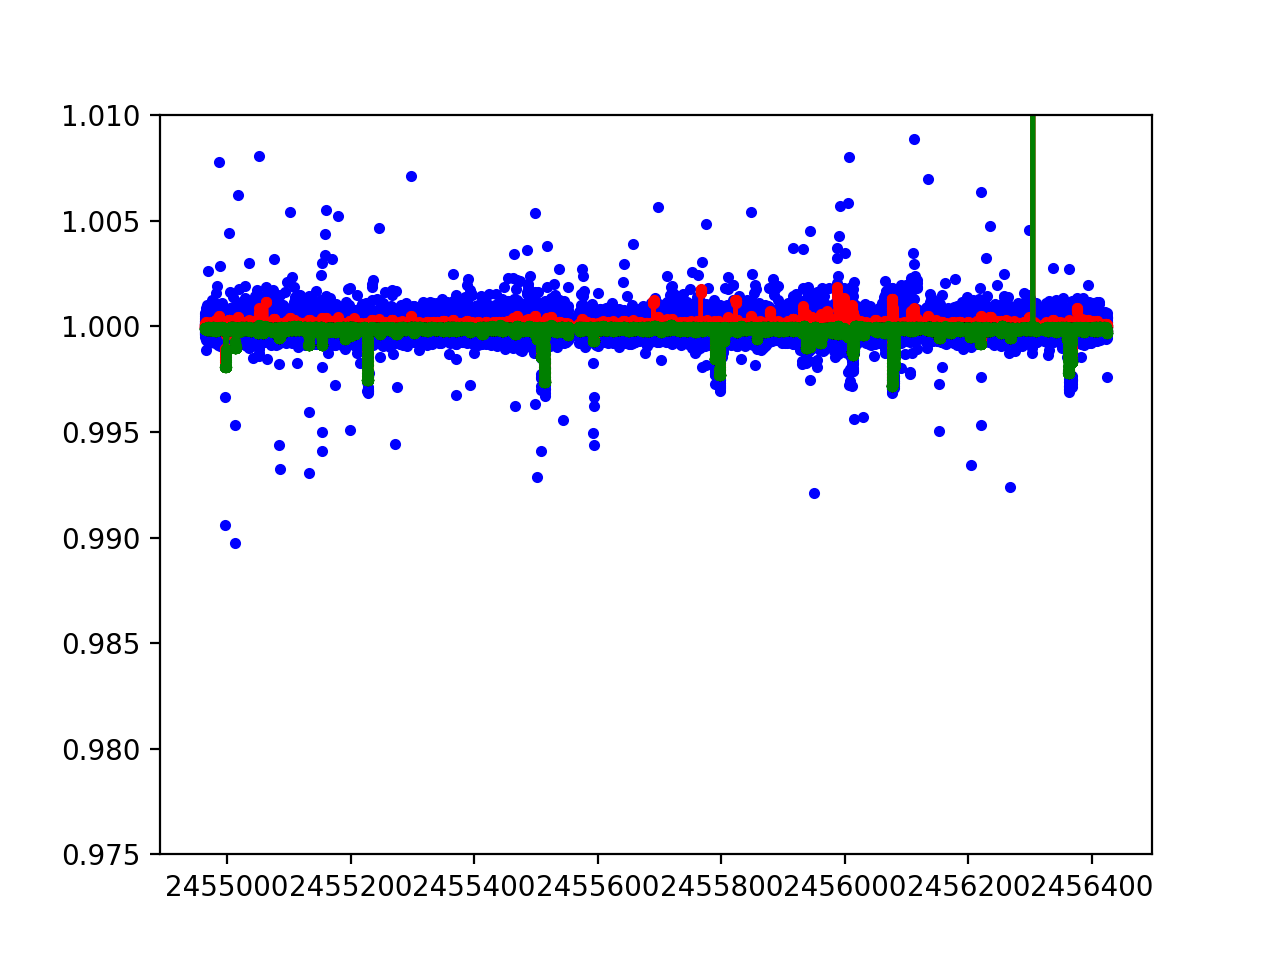

(0.975, 1.01)

In [11]:
p.figure()
p.plot(time,flux,'b.')
p.plot(time,lcstat[0.3],'r.-')
p.plot(time,blurlcstat[0.3],'g.-')
p.ylim(0.975,1.01)

In [16]:

#define range over which to scan
ppset = np.linspace(p_p0*0.97,p_p0*1.03,101)
#fpset = np.linspace(cb.fp*0.98,cb.fp*1.02,11)
print(np.diff(1./ppset))
nbins = (1/100. - 1/500.) / (2.5e-6)
print(nbins)
invppset = np.linspace(1/500.,1/100.,nbins)
ppset = 1./invppset[::-1] #uniform in frequency
fpset = np.linspace(0,2*np.pi,700)
print(ppset)
print(fpset)

[ -2.20646539e-06  -2.20373912e-06  -2.20101789e-06  -2.19830170e-06
  -2.19559054e-06  -2.19288439e-06  -2.19018324e-06  -2.18748707e-06
  -2.18479589e-06  -2.18210966e-06  -2.17942839e-06  -2.17675205e-06
  -2.17408065e-06  -2.17141415e-06  -2.16875256e-06  -2.16609586e-06
  -2.16344404e-06  -2.16079709e-06  -2.15815499e-06  -2.15551773e-06
  -2.15288531e-06  -2.15025770e-06  -2.14763490e-06  -2.14501690e-06
  -2.14240368e-06  -2.13979523e-06  -2.13719155e-06  -2.13459261e-06
  -2.13199841e-06  -2.12940894e-06  -2.12682419e-06  -2.12424413e-06
  -2.12166877e-06  -2.11909809e-06  -2.11653208e-06  -2.11397072e-06
  -2.11141402e-06  -2.10886195e-06  -2.10631450e-06  -2.10377166e-06
  -2.10123343e-06  -2.09869979e-06  -2.09617073e-06  -2.09364623e-06
  -2.09112630e-06  -2.08861091e-06  -2.08610006e-06  -2.08359373e-06
  -2.08109192e-06  -2.07859461e-06  -2.07610179e-06  -2.07361345e-06
  -2.07112959e-06  -2.06865018e-06  -2.06617523e-06  -2.06370471e-06
  -2.06123862e-06  -2.05877695e-06

/Users/davidarmstrong/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


In [17]:
#run nbody scan
tts_all = {}
tds_all = {}

#horrible for loop 

for ipp,pp in enumerate(ppset):
    cb.ap = ( (cb.m1+cb.m2) * (pp/365.25)**2 )**(1./3.)
    if ipp%5 == 0:
        print(ipp/len(ppset))
    tts_all[str(pp)[:6]] = {}
    tds_all[str(pp)[:6]] = {}
       
    for fp in fpset:
        cb.fp = fp
                     
        ttimes, tdurs = funcs.reb_cb_dvm(cb, 0, 2, tmin=np.min(time), 
                                        tmax=np.max(time), timing_precision=timing_precision)
                            
        tts_all[str(pp)[:6]][str(fp)[:6]] = ttimes[tdurs>0]
        tds_all[str(pp)[:6]][str(fp)[:6]] = tdurs[tdurs>0]

0.0


/Users/davidarmstrong/anaconda/lib/python3.6/site-packages/rebound/simulation.py:507: RuntimeWarning: At least 10 predictor corrector loops in IAS15 did not converge. This is typically an indication of the timestep being too large.
  warnings.warn(msg[1:], RuntimeWarning)


0.0015625
0.003125
0.0046875
0.00625
0.0078125
0.009375
0.0109375
0.0125
0.0140625
0.015625
0.0171875
0.01875
0.0203125
0.021875
0.0234375
0.025
0.0265625
0.028125
0.0296875
0.03125
0.0328125


KeyboardInterrupt: 

In [45]:
windows = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
periodogram = funcs.make_periodogram(tts_all,tds_all,ppset,fpset,windows,blurlcstat)

<IPython.core.display.Javascript object>


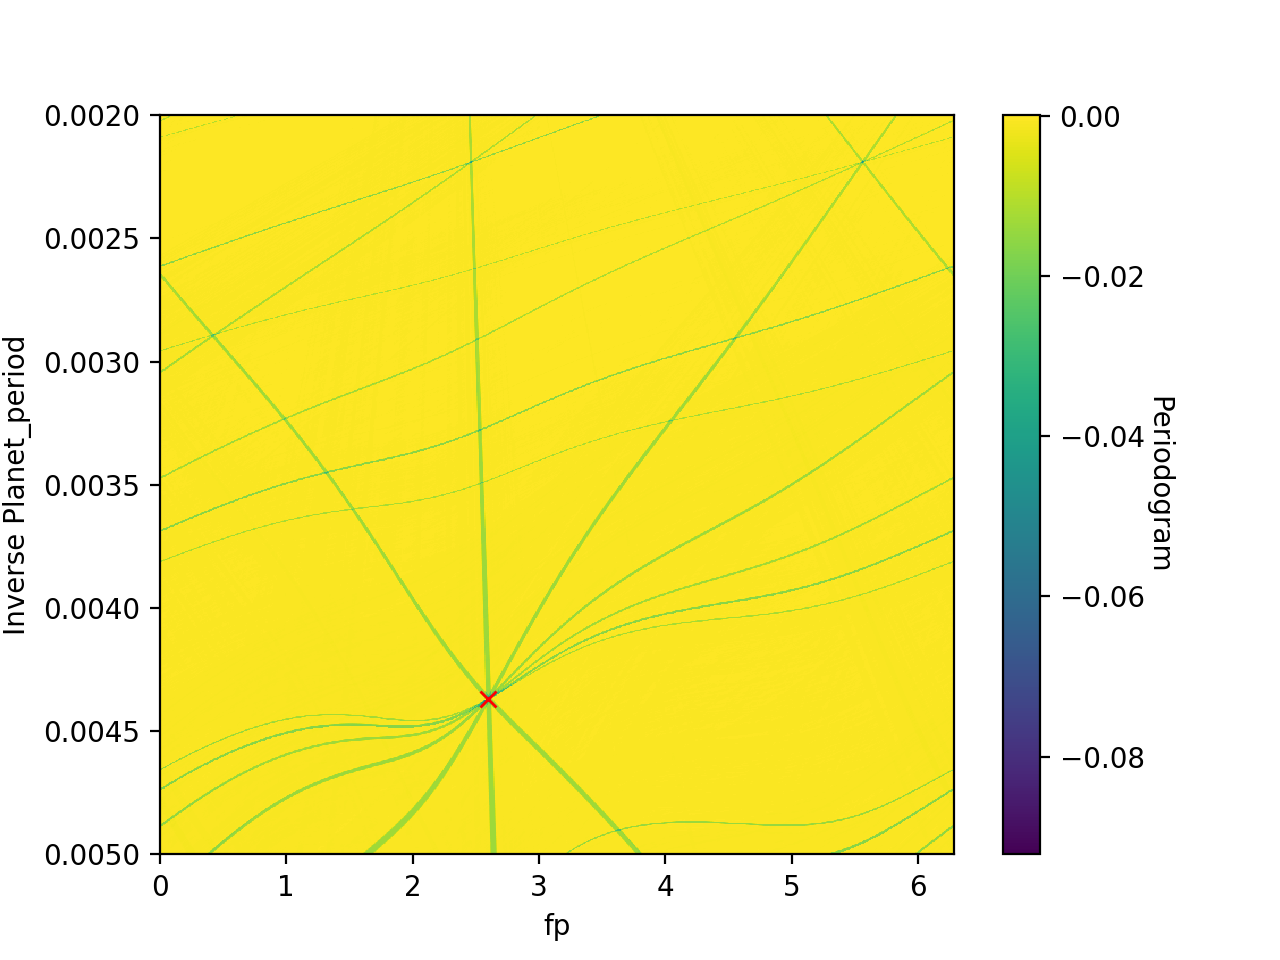

In [55]:
p.figure()
palette = p.cm.viridis
p.imshow(periodogram,origin='lower',
         extent=[np.min(fpset),np.max(fpset),1./np.min(ppset),1./np.max(ppset)],
         aspect='auto',cmap=palette)
cbar = p.colorbar()
cbar.set_label('Periodogram', rotation=270, labelpad=10)
p.ylabel('Inverse Planet_period')
p.xlabel('fp')
p.plot(fp0,1./p_p0,'rx')

In [49]:
print(np.argmin(periodogram))
print(np.unravel_index(np.argmin(periodogram),(len(ppset),len(fpset))))

175288
(250, 288)


In [56]:
#try without K16b transits
lc_notran = np.genfromtxt('K16_cln_noecl_notran.txt')
time_nt = lc_notran[:,0]
flux_nt = lc_notran[:,1]
err_nt = lc_notran[:,2]

windows = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
minpoints = 3
blurfactor = 1. #using a blurfactor of win means a 3 duration window is scanned.
#window lightcurve with duration - 
lcstat_nt = {}
blurlcstat_nt = {}
for win in windows:
    lcstat_nt[win], blurlcstat_nt[win] = funcs.running_mean_gaps(time_nt,flux_nt,win,minpoints,blurfactor)


In [57]:
periodogram_nt = funcs.make_periodogram(tts_all,tds_all,ppset,fpset,windows,blurlcstat_nt)

In [58]:
periodogram_nt

array([[ -5.46880688e-04,  -5.28498672e-04,  -5.81713951e-04, ...,
         -5.46634676e-04,  -4.64904573e-04,  -5.46880688e-04],
       [ -4.91427153e-04,  -4.85698493e-04,  -5.42476687e-04, ...,
         -5.41177386e-04,  -4.67285321e-04,  -4.91427153e-04],
       [ -5.36625548e-04,  -4.71007596e-04,  -4.19228475e-04, ...,
         -5.54221867e-04,  -5.41365941e-04,  -5.36625548e-04],
       ..., 
       [ -1.78155975e-04,  -1.87368561e-04,  -1.75204856e-04, ...,
         -1.31177896e-04,  -8.14013815e-05,  -1.78155975e-04],
       [ -1.06957175e-04,  -1.69214066e-04,  -1.57374066e-04, ...,
         -9.02448683e-05,  -1.61114514e-04,  -1.06957175e-04],
       [ -1.14606384e-04,  -1.59440184e-04,  -1.81734140e-04, ...,
         -8.38692952e-05,  -9.88137715e-05,  -1.14606384e-04]])

<IPython.core.display.Javascript object>


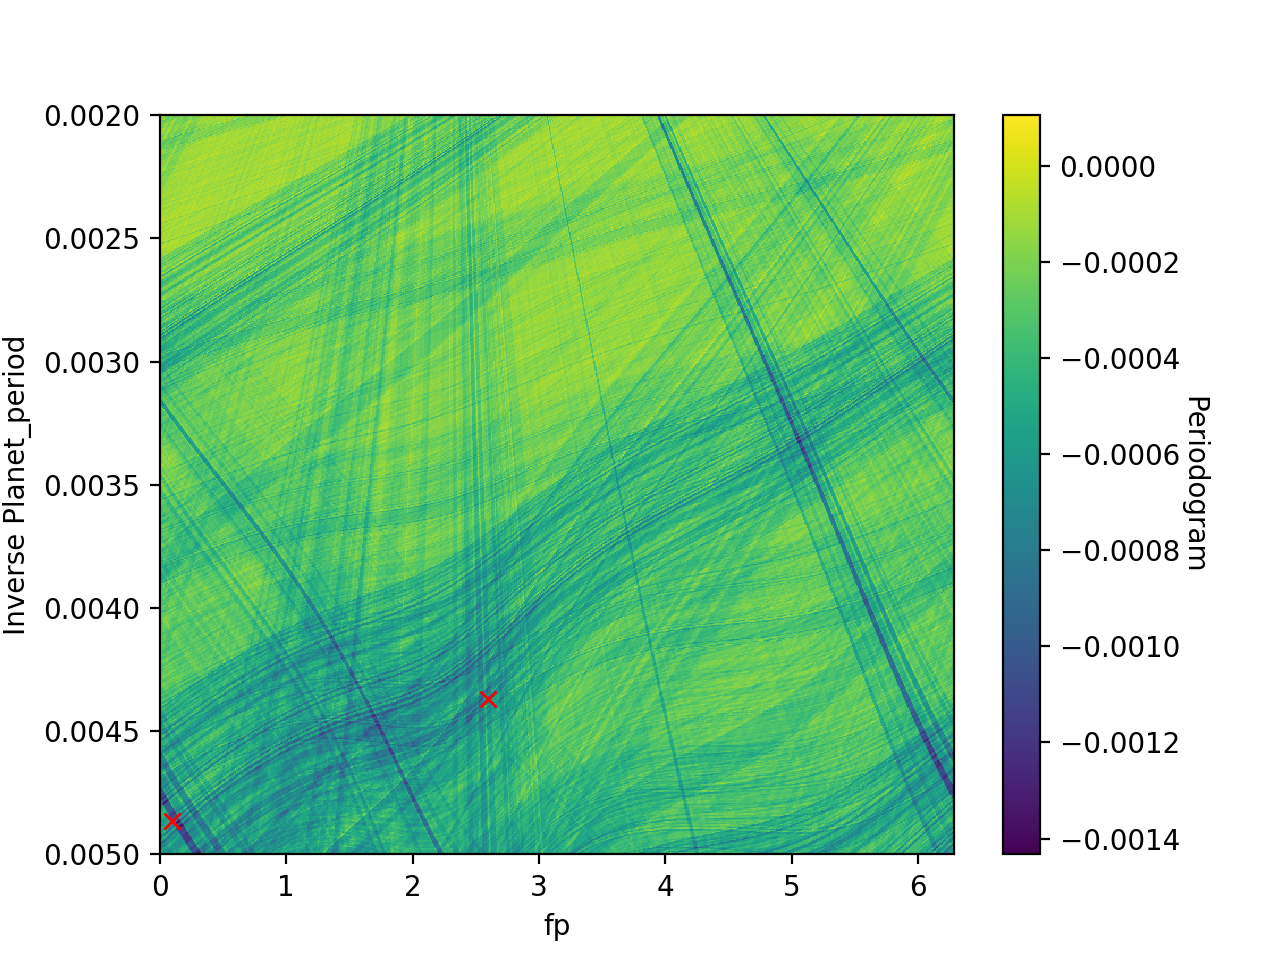

In [76]:
p.figure()
palette = p.cm.viridis
p.imshow(periodogram_nt,origin='lower',
         extent=[np.min(fpset),np.max(fpset),1./np.min(ppset),1./np.max(ppset)],
         aspect='auto',cmap=palette)
cbar = p.colorbar()
cbar.set_label('Periodogram', rotation=270, labelpad=10)
p.ylabel('Inverse Planet_period')
p.xlabel('fp')
p.plot(fp0,1./p_p0,'rx')
minidx = np.unravel_index(np.argmin(periodogram_nt),(len(ppset),len(fpset)))
p.plot(fpset[minidx[1]],1./ppset[minidx[0]],'rx')

<IPython.core.display.Javascript object>


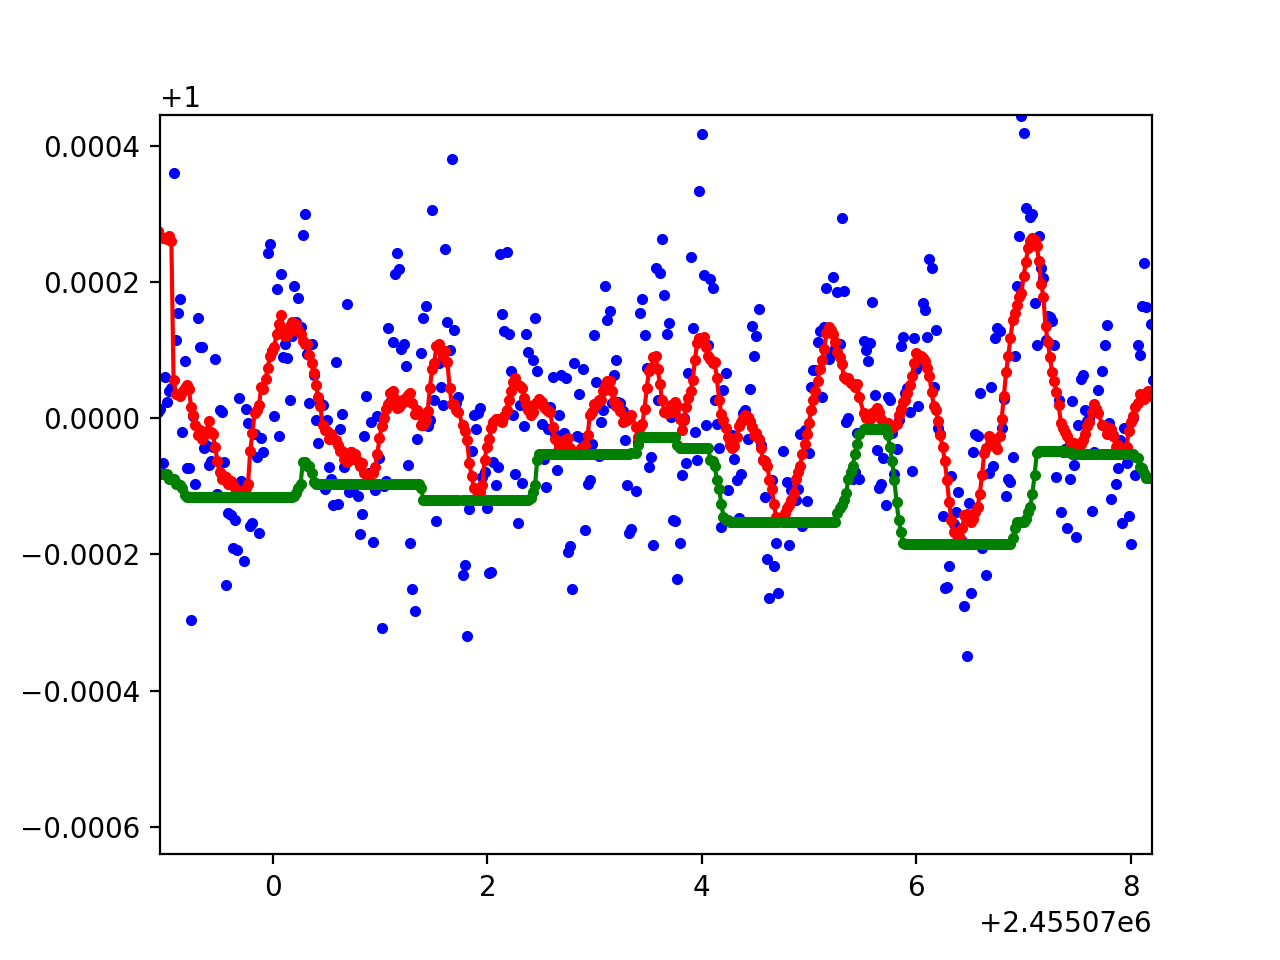

(0.999, 1.002)

In [62]:
p.figure()
p.plot(time_nt,flux_nt,'b.')
p.plot(time_nt,lcstat_nt[0.3],'r.-')
p.plot(time_nt,blurlcstat_nt[0.3],'g.-')
p.ylim(0.999,1.002)

In [63]:
print(np.argmin(periodogram_nt))
print(np.unravel_index(np.argmin(periodogram_nt),(len(ppset),len(fpset))))

37811
(54, 11)


<IPython.core.display.Javascript object>


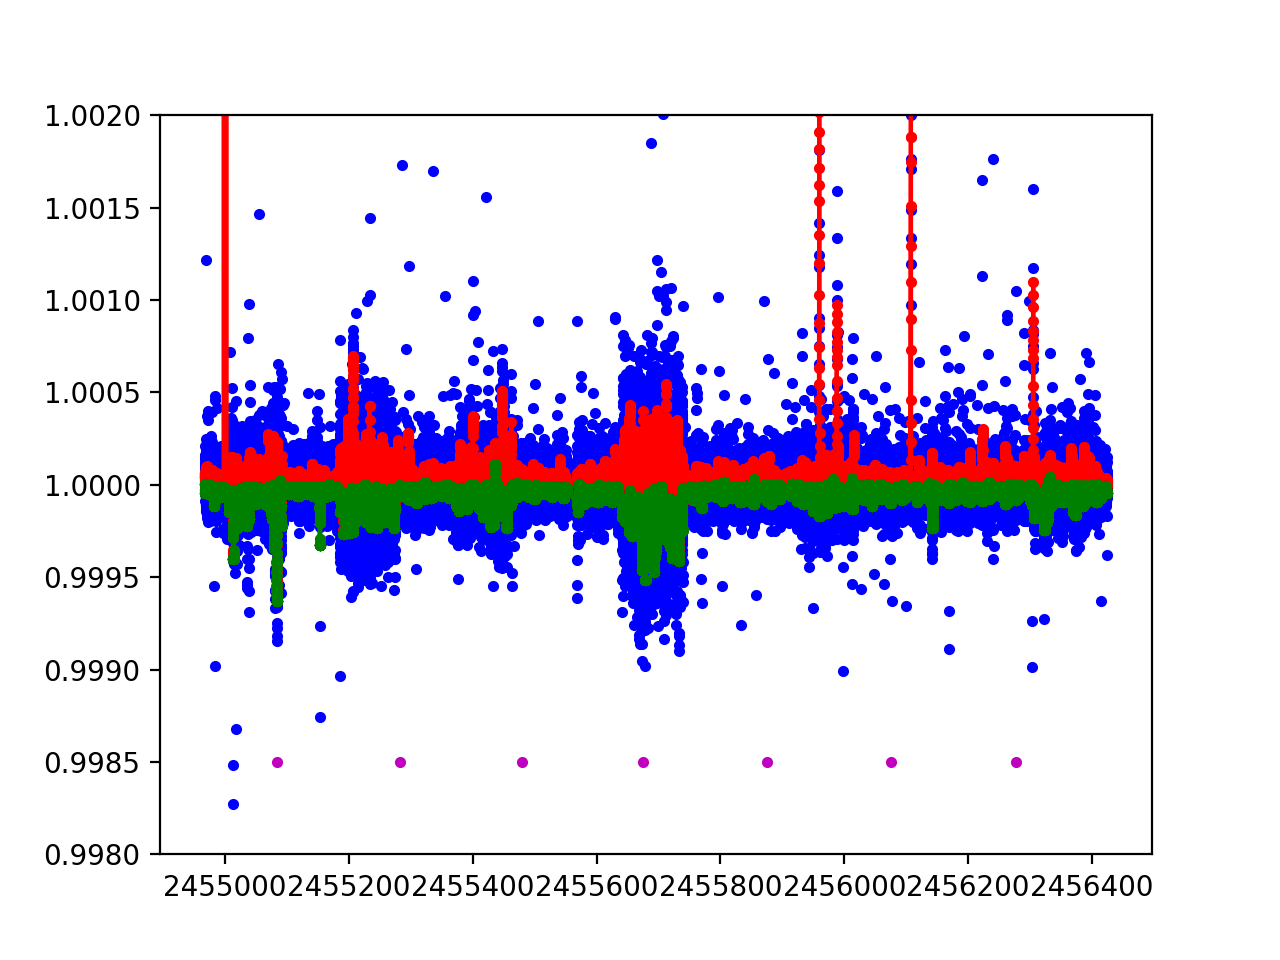

[ 2455083.63025269  2455283.29690446  2455480.07511435  2455675.77631582
  2455875.34921796  2456075.94573892  2456276.90232199]
[ 0.25485651  0.30926213  0.5546332   0.33367683  0.25587384  0.23438658
  0.22887086]


(0.998, 1.002)

In [78]:
p.figure()
p.plot(time_nt,flux_nt,'b.')
p.plot(time_nt,lcstat_nt[0.3],'r.-')
p.plot(time_nt,blurlcstat_nt[0.3],'g.-')

pp = ppset[54]
fp = fpset[11]

tts = tts_all[str(pp)[:6]][str(fp)[:6]]
tds = tds_all[str(pp)[:6]][str(fp)[:6]]
print(tts)
print(tds)
for transit,dur in zip(tts,tds):
    p.plot(transit,0.9985,'m.')
    #p.plot([transit-dur/2.,transit+dur/2.],[0.999,0.999])

p.ylim(0.998,1.002)

In [79]:
periodogram_nt_noblur = funcs.make_periodogram(tts_all,tds_all,ppset,fpset,windows,lcstat_nt)

<IPython.core.display.Javascript object>


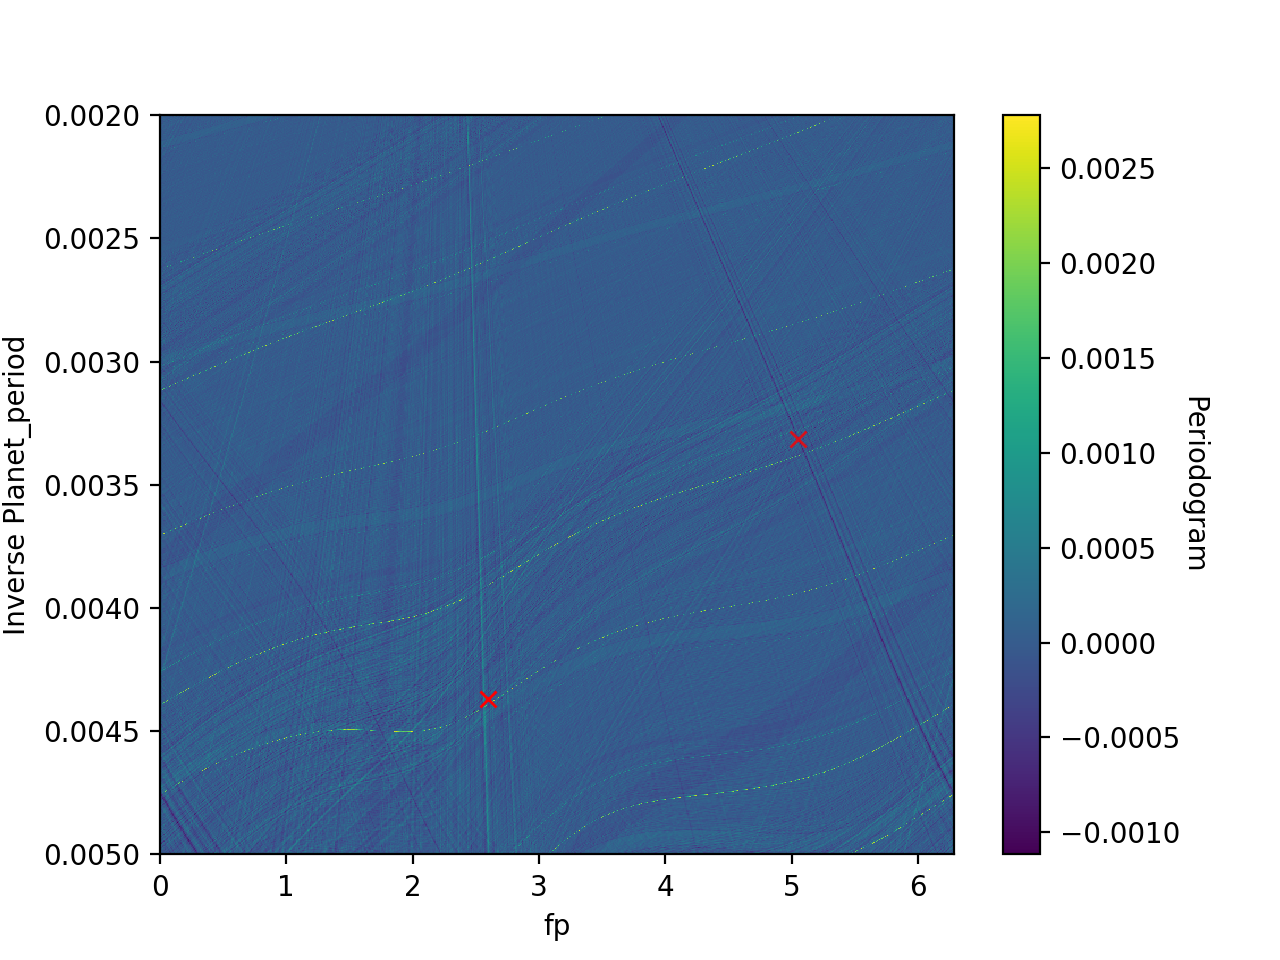

In [82]:
periodogram_nt_noblur[periodogram_nt_noblur>100] = 0
p.figure()
palette = p.cm.viridis
p.imshow(periodogram_nt_noblur,origin='lower',
         extent=[np.min(fpset),np.max(fpset),1./np.min(ppset),1./np.max(ppset)],
         aspect='auto',cmap=palette)
cbar = p.colorbar()
cbar.set_label('Periodogram', rotation=270, labelpad=10)
p.ylabel('Inverse Planet_period')
p.xlabel('fp')
p.plot(fp0,1./p_p0,'rx')
minidx = np.unravel_index(np.argmin(periodogram_nt_noblur),(len(ppset),len(fpset)))
p.plot(fpset[minidx[1]],1./ppset[minidx[0]],'rx',alpha=0.8)